# Binary Search Tree 

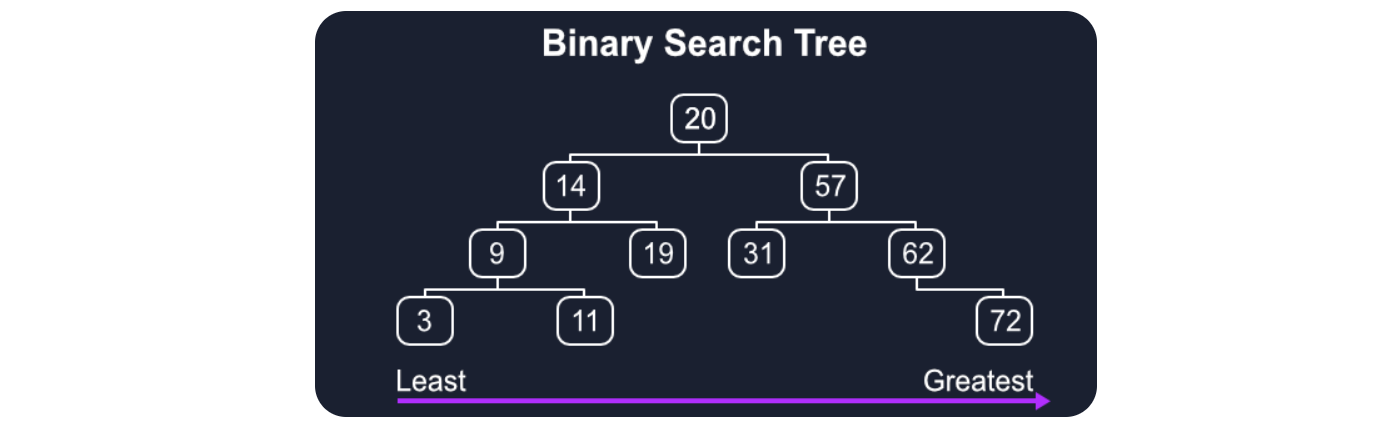

In [1]:
class BTNode:
    def __init__(self,data):
        self.data = data
        self.left = None
        self.right = None        

In [2]:
def printTree(root):
    if root == None:
        return
    print(root.data,end=":")
    if root.left is not None:
        print("L",root.left.data,end=",")
    if root.right is not None:
        print("R",root.right.data,end="")
    print()
    printTree(root.left)
    printTree(root.right)

#### Tree input

In [3]:
def treeInput():
    rootData = int(input())
    if rootData == -1:
        return
    root = BTNode(rootData)
    root.left = treeInput()
    root.right = treeInput()

### Level Wise Tree Input 

In [4]:
import queue
def LWInput():
    q = queue.Queue()
    print("Enter root :")
    rootData = int(input())
    if rootData == -1:
        return None
    root = BTNode(rootData)
    q.put(root)
    while not q.empty():
        currNode = q.get()
        print("Enter left child of ",currNode.data ,":")
        leftchildData = int(input())
        if leftchildData != -1:
            leftNode = BTNode(leftchildData)
            currNode.left = leftNode
            q.put(leftNode)
            
        print("Enter right child of ",currNode.data ,":")
        rightchildData = int(input())
        if rightchildData != -1:
            rightNode = BTNode(rightchildData)
            currNode.right = rightNode
            q.put(rightNode)
    return root    

### Search target

In [5]:
def searchTarget(root,k):
    if root is None:
        return False
    if root.data==k:
        return True
    elif root.data > k and root.left is not None:
        return searchTarget(root.left,k)
    else:
        return searchTarget(root.right,k)
    

In [6]:
root = LWInput()
printTree(root)

Enter root :
4
Enter left child of  4 :
2
Enter right child of  4 :
6
Enter left child of  2 :
1
Enter right child of  2 :
3
Enter left child of  6 :
5
Enter right child of  6 :
7
Enter left child of  1 :
-1
Enter right child of  1 :
-1
Enter left child of  3 :
-1
Enter right child of  3 :
-1
Enter left child of  5 :
-1
Enter right child of  5 :
-1
Enter left child of  7 :
-1
Enter right child of  7 :
-1
4:L 2:R 6
2:L 1:R 3
1:
3:
6:L 5:R 7
5:
7:


In [7]:
print(searchTarget(root,5))

True


### Elemtns between K1 and K2 

In [8]:
def elementsk1tok2(root,k1,k2):
    if root is None:
        return
    if root.data < k1:
        elementsk1tok2(root.right,k1,k2)
    elif root.data > k2:
        elementsk1tok2(root.left,k1,k2)
    else:
        print(root.data,end = " ")
        elementsk1tok2(root.left,k1,k2)
        elementsk1tok2(root.right,k1,k2)

In [9]:
elementsk1tok2(root,2,5)

4 2 3 5 

### Array to BST 

In [10]:
def arraytoBST(arr):
    if len(arr)==0:
        return
    mid = len(arr)//2
    root = BTNode(arr[mid])
    root.left = arraytoBST(arr[:mid])
    root.right = arraytoBST(arr[mid+1:])
    return root

In [11]:
root = arraytoBST([1,2,3,4,5,6,7])
printTree(root)

4:L 2:R 6
2:L 1:R 3
1:
3:
6:L 5:R 7
5:
7:


### Check BST 

In [12]:
def minTree(root):
    if root == None:
        return 10000
    leftmin = minTree(root.left)
    rightmin = minTree(root.right)
    return min(leftmin,rightmin,root.data)

In [13]:
def maxTree(root):
    if root == None:
        return -10000
    leftmax = maxTree(root.left)
    rightmax = maxTree(root.right)
    return max(leftmax,rightmax,root.data)

In [14]:
def isBST(root):
    if root is None:
        return True
    leftMax = maxTree(root.left)
    rightMin = minTree(root.right)
    if root.data > rightMin or root.data <= leftMax:
        return False
    return isBST(root.left) and isBST(root.right)

In [15]:
print(isBST(root))

True


### IS BST Improved

In [16]:
def isBST2(root):
    if root is None:
        return 10000,-10000,True
    leftmin,leftmax,isleftBST = isBST2(root.left)
    rightmin,rightmax,isrightBST = isBST2(root.right)
    
    minimum = min(leftmin,rightmin,root.data)
    maximum = max(leftmax,rightmax,root.data)
    
    istreeBST = True
    
    if root.data <= leftmax or root.data > rightmin:
        istreeBST = False
    if not(isleftBST) or not(isrightBST):
        istreeBST = False
        
    return minimum, maximum,istreeBST

In [17]:
isBST2(root)

(1, 7, True)

### Another Improver VErsion of isBST

In [18]:
# Another solution for isBST 
def isBST3(root,min_range,max_range):
    if root == None:
        return True 
    if root.data < min_range or root.data > max_range:
        return False 
  
    isLeftWithinConstraints = isBST3(root.left, min_range, root.data -1)
    isRightWithinConstraints = isBST3(root.right,root.data,max_range)

    return isLeftWithinConstraints and isRightWithinConstraints

In [20]:
isBST3(root,-10000,10000)

True

### Root to node path

In [30]:
def rootNodePath(root,k):
    if root is None:
        return None
    if root.data == k:
        l = list()
        l.append(root.data)
        return l
        
    leftop = rootNodePath(root.left,k)
    if leftop != None:
        leftop.append(root.data)
        return leftop
    rightop = rootNodePath(root.right,k)
    if rightop != None:
        rightop.append(root.data)
        return rightop
    else:
        return None

In [31]:
print(rootNodePath(root,5))

[5, 6, 4]


### BST Class

In [41]:
class BTNode:
    def __init__(self,data):
        self.data = data
        self.left = None
        self.right = None  

In [42]:
class BST:
    def __init__(self):
        self.root = None
        self.numNodes = 0
        
    def printTreeHelper(self,root):
        if root == None:
            return
        print(root.data,end=":")
        if root.left is not None:
            print("L",root.left.data,end=",")
        if root.right is not None:
            print("R",root.right.data,end="")
        print()
        self.printTreeHelper(root.left)
        self.printTreeHelper(root.right)
        
    def isPresentHelper(self,root,data):
        if self.root == None:
            return False
        if self.root.data == data:
            return True
        if self.root.data > data:
            # call on left
            self.isPresentHelper(root.left,data)
        else:
            # call on right
            self.isPresentHelper(root.right,data)
            
    def insertHelper(self,root,data):
        if root == None:
            node = BTNode(data)
            return node
        if root.data > data:
            root.left = self.insertHelper(root.left,data)
            return root
        else:
            root.right = self.insertHelper(root.right,data)
            return root
        
    def min(self,root):
        if root == None:
            return 10000

        if root.left == None:
            return root.data 
        return self.min(root.left)    
    def deleteHelper(self,root,data):
        if root == None:
            return False, None 
        if root.data < data:
            deleted, newRightNode = self.deleteHelper(root.right, data)
            root.right = newRightNode
            return deleted, root 
        if root.data > data:
            deleted, newLeftNode = self.deleteHelper(root.left, data)
            root.left = newLeftNode
            return deleted, root
        #root is leaf
        if root.left == None and root.right == None:
            return True , None

        #root has one child 
        if root.left == None:
            return True, root.right 

        if root.right == None:
            return True , root.left 

        #root has two children 
        replacement = min(root.right)
        root.data = replacement
        deleted, newRightNode = self.deleteHelper(root.right, replacement)
        root.right = newRightNode
        return deleted, root
            
    def isPresent(self,data):
        return self.isPresentHelper(self.root,data)
    
    def insert(self,data):
        self.numNodes += 1
        self.root = self.insertHelper(self.root,data)
    
    def delete(self,data):
        deleted, newRoot = self.deleteHelper(self.root,data)
        if deleted:
            self.numNodes -= 1
        self.root = newRoot 
        return deleted
    
    def count():
        return self.numNodes

    def printTree(self):
        self.printTreeHelper(self.root)

In [45]:
b = BST()
b.insert(10)
b.insert(5)
b.insert(12)
#print(b.isPresent(10),b.isPresent(9))
#print(b.delete(4),b.delete(10))
#print(b.count())
b.printTree()

10:L 5:R 12
5:
12:
